<a href="https://colab.research.google.com/github/ugosamartins-commits/Sorbonne-M1-Analyse-Donnees-Portfolio-Ugo-Martins/blob/main/Seance_07/seance_07_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fichier téléchargé.

--- CHARGEMENT DES DONNÉES ---
Je travaille sur l'année : 2015
Nettoyage des données en cours...
Nombre de pays valides : 145

--- CALCUL DE LA RÉGRESSION ---
Équation de la droite : y = 5.2326 * x + 51009071881.5065
Coefficient de corrélation (r) : 0.9009
Coefficient de détermination (R2) : 0.8117


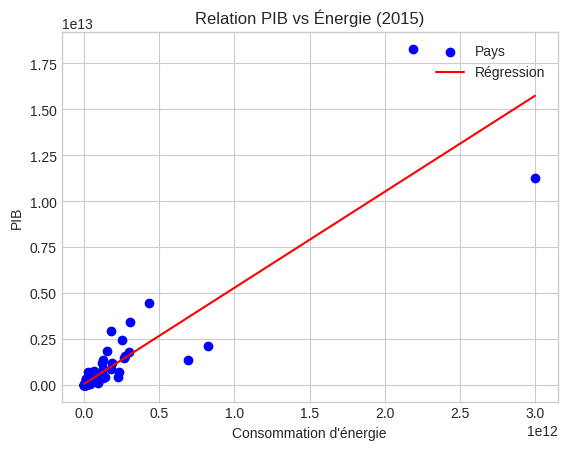


BONUS : ANALYSE GÉNÉRALISÉE (1962-2022)
Année 1970 traitée. R2 = 0.948
Année 1980 traitée. R2 = 0.848
Année 1990 traitée. R2 = 0.858
Année 2000 traitée. R2 = 0.818
Année 2010 traitée. R2 = 0.872
Année 2020 traitée. R2 = 0.837
Année 2022 traitée. R2 = 0.845
Fichier résumé sauvegardé.


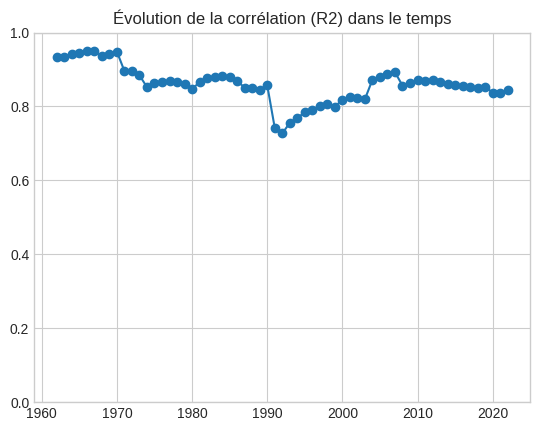

In [1]:
#coding:utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import urllib.request

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')

# --- 0. TÉLÉCHARGEMENT (Pour que ça marche sur Colab) ---
if not os.path.exists('data'):
    os.makedirs('data')
try:
    urllib.request.urlretrieve(
        "https://raw.githubusercontent.com/MaximeForriez/Sorbonne-M1-Analyse-de-donnees/main/Seance-07/Exercice/src/data/pib-vs-energie.csv",
        "data/pib-vs-energie.csv"
    )
    print("Fichier téléchargé.")
except:
    pass

# --- 1. FONCTIONS LOCALES ---
def ouvrirUnFichier(nom):
    # J'utilise le moteur python pour éviter les soucis de séparateur
    return pd.read_csv(nom, sep=None, engine='python')

# --- 2. PROGRAMME PRINCIPAL ---

print("\n--- CHARGEMENT DES DONNÉES ---")
data = ouvrirUnFichier("./data/pib-vs-energie.csv")

# Choix de l'année pour l'exercice principal (ex: 2015 ou 2022)
annee = "2015"
nom_col_pib = "PIB_" + annee
nom_col_energie = "Utilisation_d_energie_" + annee

print("Je travaille sur l'année :", annee)

# 1. Nettoyage des données (Consigne : Boucle for + isNaN)
print("Nettoyage des données en cours...")
x_propres = [] # Énergie
y_propres = [] # PIB

# Je récupère les colonnes brutes
liste_pib = data[nom_col_pib].tolist()
liste_energie = data[nom_col_energie].tolist()

# Je parcours chaque ligne une par une
for i in range(len(liste_pib)):
    valeur_pib = liste_pib[i]
    valeur_energie = liste_energie[i]

    # Je vérifie si les valeurs sont bien des nombres (pas vides)
    try:
        # Conversion forcée en float (pour gérer les nombres en string)
        p = float(valeur_pib)
        e = float(valeur_energie)

        # Test si ce n'est pas un NaN (Not a Number)
        if not np.isnan(p) and not np.isnan(e):
            # Je garde uniquement si les deux existent
            y_propres.append(p) # Y = PIB
            x_propres.append(e) # X = Énergie
    except:
        continue # Si erreur, je passe à la ligne suivante

print("Nombre de pays valides :", len(x_propres))

# 2. Régression Linéaire (Moindres Carrés)
print("\n--- CALCUL DE LA RÉGRESSION ---")
# La fonction linregress fait tout le travail
pente, ordonnee, r_value, p_value, std_err = stats.linregress(x_propres, y_propres)

print("Équation de la droite : y =", round(pente, 4), "* x +", round(ordonnee, 4))
print("Coefficient de corrélation (r) :", round(r_value, 4))
print("Coefficient de détermination (R2) :", round(r_value**2, 4))

# 3. Graphique
plt.figure()
plt.scatter(x_propres, y_propres, color='blue', label='Pays')

# Je trace la droite théorique
# Je crée des points x pour la ligne (du min au max)
x_ligne = np.linspace(min(x_propres), max(x_propres), 100)
y_ligne = pente * x_ligne + ordonnee
plt.plot(x_ligne, y_ligne, color='red', label='Régression')

plt.title("Relation PIB vs Énergie (" + annee + ")")
plt.xlabel("Consommation d'énergie")
plt.ylabel("PIB")
plt.legend()
plt.show()


# ==============================================================================
# BONUS : GÉNÉRALISATION (1962-2022) & LOG-LOG
# ==============================================================================
print("\n" + "="*40)
print("BONUS : ANALYSE GÉNÉRALISÉE (1962-2022)")
print("="*40)

# Création du dossier pour ranger les résultats
if not os.path.exists("Resultats_Bonus_Seance7"):
    os.makedirs("Resultats_Bonus_Seance7")

resultats_bonus = [] # Pour stocker le résumé

# Boucle sur toutes les années
for an in range(1962, 2023): # De 1962 à 2022
    an_str = str(an)
    col_p = "PIB_" + an_str
    col_e = "Utilisation_d_energie_" + an_str

    # Vérif si les colonnes existent
    if col_p in data.columns and col_e in data.columns:
        # Nettoyage rapide pour le bonus (méthode optimisée)
        df_temp = data[[col_e, col_p]].copy()
        # On passe en float et on supprime les erreurs
        df_temp = df_temp.apply(pd.to_numeric, errors='coerce')
        df_temp = df_temp.dropna()
        # On garde que le positif pour le Logarithme
        df_temp = df_temp[(df_temp[col_e] > 0) & (df_temp[col_p] > 0)]

        if len(df_temp) > 10:
            # Transformation Log-Log (pour corriger l'échelle)
            x_log = np.log(df_temp[col_e])
            y_log = np.log(df_temp[col_p])

            # Régression sur les logs
            slope, intercept, r, p, err = stats.linregress(x_log, y_log)

            # Stockage
            resultats_bonus.append([an, r**2, slope])

            # On génère le graphique seulement tous les 10 ans pour l'exemple
            if an % 10 == 0 or an == 2022:
                plt.figure()
                plt.scatter(x_log, y_log, alpha=0.5)
                plt.plot(x_log, slope*x_log + intercept, color='orange')
                plt.title("Log-Log : PIB vs Energie (" + an_str + ")")
                plt.xlabel("Log(Energie)")
                plt.ylabel("Log(PIB)")
                # Sauvegarde
                plt.savefig("Resultats_Bonus_Seance7/graph_" + an_str + ".png")
                plt.close() # Ferme l'image pour libérer la mémoire
                print("Année", an, "traitée. R2 =", round(r**2, 3))

# Sauvegarde du résumé CSV
df_res = pd.DataFrame(resultats_bonus, columns=["Annee", "R2", "Elasticite"])
df_res.to_csv("Resultats_Bonus_Seance7/Resume_Statistiques_1962-2022.csv", index=False)
print("Fichier résumé sauvegardé.")

# Graphique d'évolution du R2
plt.figure()
plt.plot(df_res["Annee"], df_res["R2"], marker='o')
plt.title("Évolution de la corrélation (R2) dans le temps")
plt.ylim(0, 1)
plt.show()

=== LANCEMENT DU BONUS : ANALYSE TEMPORELLE (1962-2022) ===
Traitement en cours...
-> Année 1970 traitée.
-> Année 1980 traitée.
-> Année 1990 traitée.
-> Année 2000 traitée.
-> Année 2010 traitée.
-> Année 2020 traitée.
-> Année 2022 traitée.

ANALYSE TERMINÉE !
Le fichier résumé est ici : Resultats_Bonus_Seance7/Synthese_Resultats_1962-2022.csv


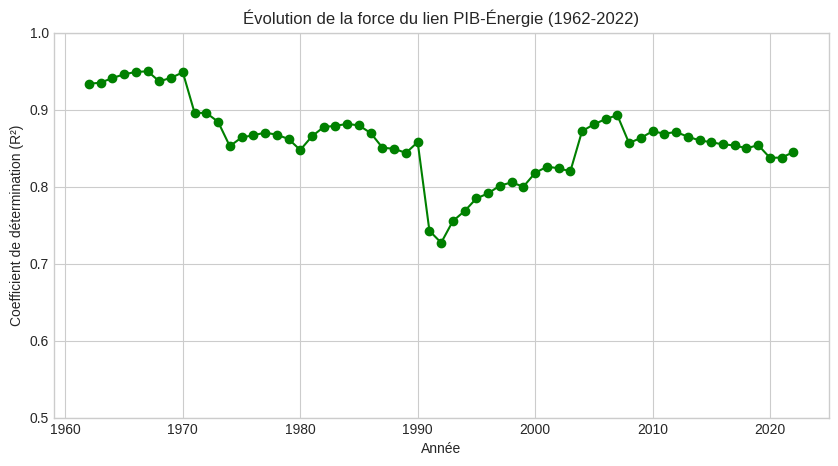

Le graphique d'évolution temporelle a été généré.


In [2]:
#coding:utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

print("=== LANCEMENT DU BONUS : ANALYSE TEMPORELLE (1962-2022) ===")

# 1. Préparation des dossiers et fichiers
# ---------------------------------------------------------
# Je crée un dossier spécifique pour ne pas mélanger tous les fichiers
dossier_sortie = "Resultats_Bonus_Seance7"
if not os.path.exists(dossier_sortie):
    os.makedirs(dossier_sortie)
    print(f"Dossier créé : {dossier_sortie}/")

# Je charge les données (Assure-toi que le fichier est dans le dossier data)
try:
    data = pd.read_csv("./data/pib-vs-energie.csv", sep=None, engine='python')
except:
    # Si le fichier n'est pas dans data, on essaie à la racine
    data = pd.read_csv("pib-vs-energie.csv", sep=None, engine='python')

# Liste pour stocker le résumé des résultats année par année
resume_resultats = []

# 2. Boucle sur toutes les années
# ---------------------------------------------------------
print("Traitement en cours...")

# On boucle de 1962 à 2022 inclus (donc range va jusqu'à 2023)
for annee in range(1962, 2023):

    # Construction des noms de colonnes dynamiques
    col_pib = "PIB_" + str(annee)
    col_energie = "Utilisation_d_energie_" + str(annee)

    # Vérification de sécurité : est-ce que ces colonnes existent ?
    if col_pib in data.columns and col_energie in data.columns:

        # 3. Nettoyage des données pour cette année spécifique
        x_vals = [] # Énergie
        y_vals = [] # PIB

        # On récupère les colonnes brutes
        liste_pib = data[col_pib].tolist()
        liste_energie = data[col_energie].tolist()

        for i in range(len(liste_pib)):
            try:
                # Conversion et nettoyage
                p = float(liste_pib[i])
                e = float(liste_energie[i])

                # IMPORTANT : Pour le Log, il faut des valeurs > 0
                # On élimine aussi les NaN
                if p > 0 and e > 0 and not np.isnan(p) and not np.isnan(e):
                    x_vals.append(np.log(e)) # Transformation Log
                    y_vals.append(np.log(p)) # Transformation Log
            except:
                continue

        # On ne fait le calcul que s'il y a assez de pays (ex: plus de 10)
        if len(x_vals) > 10:

            # 4. Calcul de la régression (Log-Log)
            pente, constante, r_value, p_value, std_err = stats.linregress(x_vals, y_vals)
            r_carre = r_value**2

            # 5. Sauvegarde des stats pour le résumé final
            resume_resultats.append([annee, len(x_vals), r_carre, pente])

            # 6. Génération du graphique (Optionnel : 1 par an)
            # Pour ne pas surcharger Colab, on peut générer le graph seulement tous les 10 ans
            if annee % 10 == 0 or annee == 2022:
                plt.figure(figsize=(8, 5))
                plt.scatter(x_vals, y_vals, alpha=0.5, s=15, label='Pays')

                # Droite de régression
                x_ligne = np.linspace(min(x_vals), max(x_vals), 100)
                y_ligne = pente * x_ligne + constante
                plt.plot(x_ligne, y_ligne, color='red', label=f'R²={r_carre:.2f}')

                plt.title(f"Année {annee} : Élasticité PIB/Énergie (Log-Log)")
                plt.xlabel("Log(Énergie)")
                plt.ylabel("Log(PIB)")
                plt.legend()

                # Sauvegarde du fichier image
                nom_image = f"{dossier_sortie}/Graphique_{annee}.png"
                plt.savefig(nom_image)
                plt.close() # On ferme pour libérer la mémoire
                print(f"-> Année {annee} traitée.")

# 3. Exportation du Résumé Final
# ---------------------------------------------------------
if len(resume_resultats) > 0:
    # Création d'un tableau propre avec les résultats
    df_resume = pd.DataFrame(resume_resultats, columns=["Annee", "Nb_Pays", "R2", "Elasticite"])

    # Sauvegarde en CSV
    chemin_csv = f"{dossier_sortie}/Synthese_Resultats_1962-2022.csv"
    df_resume.to_csv(chemin_csv, index=False)

    print("\nANALYSE TERMINÉE !")
    print(f"Le fichier résumé est ici : {chemin_csv}")

    # 4. Graphique final : Évolution de la corrélation
    plt.figure(figsize=(10, 5))
    plt.plot(df_resume["Annee"], df_resume["R2"], marker='o', color='green')
    plt.title("Évolution de la force du lien PIB-Énergie (1962-2022)")
    plt.xlabel("Année")
    plt.ylabel("Coefficient de détermination (R²)")
    plt.ylim(0.5, 1.0) # Pour bien voir les variations
    plt.grid(True)
    plt.savefig(f"{dossier_sortie}/Evolution_Correlation.png")
    plt.show()

    print("Le graphique d'évolution temporelle a été généré.")
else:
    print("Aucune donnée n'a pu être traitée. Vérifiez les noms de colonnes.")